# Imports

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import difflib
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Data

In [190]:
albums = pd.read_csv('Top5000 (1).csv', index_col=0)

In [191]:
albums.head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [192]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4402 entries, 0 to 4401
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ars_name          4402 non-null   object 
 1   rel_date          4402 non-null   object 
 2   gens              4402 non-null   object 
 3   descs             4304 non-null   object 
 4   avg_rat           4402 non-null   float64
 5   num_rat           4402 non-null   object 
 6   num_revs          4402 non-null   int64  
 7   album             4402 non-null   object 
 8   acousticness      4402 non-null   float64
 9   danceability      4402 non-null   float64
 10  energy            4402 non-null   float64
 11  instrumentalness  4402 non-null   float64
 12  liveness          4402 non-null   float64
 13  loudness          4402 non-null   float64
 14  speechiness       4402 non-null   float64
 15  tempo             4402 non-null   float64
 16  valence           4402 non-null   float64


# Data Cleaning

### Missing Values

In [193]:
albums.isna().sum()

ars_name             0
rel_date             0
gens                 0
descs               98
avg_rat              0
num_rat              0
num_revs             0
album                0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
valence              0
duration_ms          0
time_signature       0
dtype: int64

In [194]:
albums[albums['descs'].isna()].head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
773,Nino Rota,1974,"Film Score, Cinematic Classical",NaN,3.90,358,4,Amarcord,0.725333,0.419000,0.283167,0.555167,0.129700,-12.809500,0.037783,124.176417,0.456583,148495.666667,4.000000
1316,Nino Rota / Carmine Coppola,December 1974,"Film Score, Cinematic Classical",NaN,3.84,353,2,"The Godfather, Part II",0.995000,0.489000,0.058000,0.940000,0.110000,-17.876000,0.052100,63.876000,0.183000,162586.000000,4.000000
1580,Jon Brion,5 November 2002,Film Score,NaN,3.82,435,8,Punch-Drunk Love,0.820588,0.414641,0.208959,0.540400,0.190071,-17.323235,0.039612,106.106706,0.313941,155724.058824,3.647059
1646,Philip Glass,10 December 2002,"Film Score, Modern Classical",NaN,3.81,504,5,The Hours,0.995000,0.415000,0.026000,0.938000,0.107000,-36.700000,0.049600,136.191000,0.268000,285443.000000,4.000000
1683,Trevor Jones / Randy Edelman,6 October 1992,"Film Score, Cinematic Classical",NaN,3.82,322,8,The Last of the Mohicans,0.398999,0.163606,0.197225,0.893625,0.144369,-20.457313,0.040988,112.838313,0.066863,206200.062500,3.625000


### Duplicates

In [195]:
albums.duplicated().sum()

0

In [196]:
albums['album'].duplicated().sum()

0

In [197]:
albums['ars_name'].duplicated().sum()

1909

# Data Wrangling

## Categorical Features

### Artists

In [198]:
len(pd.unique(albums['ars_name']))

2493

In [199]:
sum(albums.value_counts('ars_name')>1)

925

In [200]:
albums.value_counts('ars_name')

ars_name
Various Artists     18
Miles Davis         17
Tom Waits           13
John Williams       12
John Coltrane       12
                    ..
Janet                1
Janelle Monáe        1
Jan Johansson        1
Jan Jelinek          1
파란노을 [Parannoul]     1
Length: 2493, dtype: int64

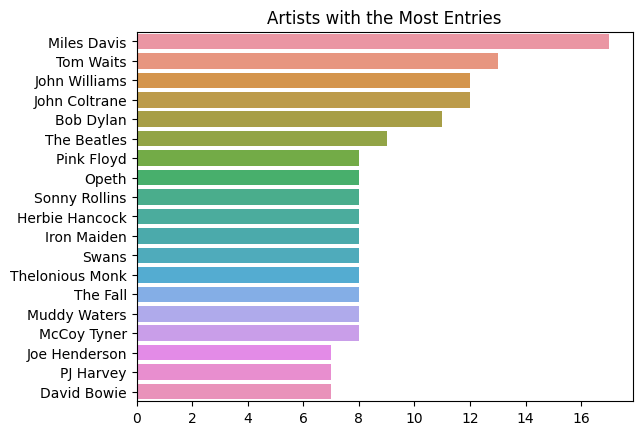

In [268]:
top_artists = albums.value_counts('ars_name').head(20)
sns.barplot(x=top_artists.values[1:], y=top_artists.index[1:], orient='h')
plt.title('Artists with the Most Entries')
plt.ylabel('')
plt.show()

### Dates

In [202]:
date = pd.to_datetime(albums['rel_date'])

In [203]:
albums['rel_date'] = date.dt.strftime('%Y')

##### Most Common Years

In [204]:
albums.value_counts('rel_date').head()

rel_date
1971    143
1973    141
1972    132
1970    124
1974    120
dtype: int64

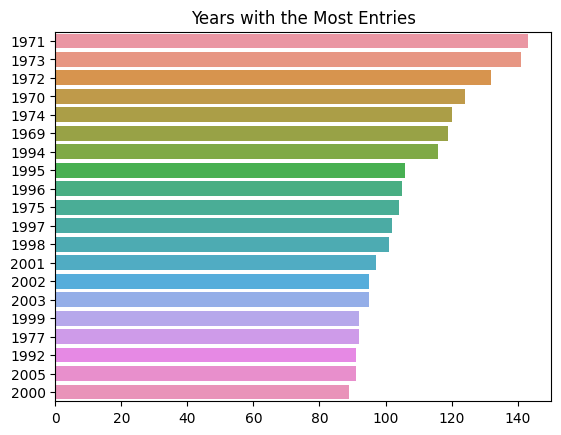

In [270]:
top_years = albums.value_counts('rel_date').head(20)
sns.barplot(x=top_years.values, y=top_years.index, orient='h')
plt.title('Years with the Most Entries')
plt.ylabel('')
plt.show()
plt.show()

##### Earliest Entries

In [206]:
albums.sort_values('rel_date').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
3352,Billie Holiday,1947,"Vocal Jazz, Traditional Pop","sentimental, female vocals, melodic, melanchol...",3.73,371,2,Billie Holiday,0.974250,0.504750,0.120208,0.034055,0.157958,-15.101583,0.040225,101.959250,0.342458,189102.166667,3.666667
2831,Duke Ellington and His Orchestra,1951,Big Band,"acoustic, female vocals, melodic, mellow, roma...",3.74,944,22,Masterpieces by Ellington,0.889857,0.390857,0.384429,0.342286,0.144700,-11.306429,0.051314,118.130143,0.433143,474769.714286,3.857143
750,Wilhelm Furtwängler / Ludwig Suthaus / Kirsten...,1952,"Opera, Romanticism","opera, epic, female vocals, romantic, male voc...",3.88,521,7,Tristan und Isolde,0.922286,0.128357,0.061911,0.725286,0.121043,-27.849429,0.041486,75.265857,0.035729,551476.142857,3.714286
3572,Thelonious Monk Trio,1953,Hard Bop,"quirky, rhythmic, raw, complex, acoustic, tech...",3.71,909,13,Thelonious,0.745571,0.499571,0.222529,0.345654,0.136200,-14.987571,0.049671,94.222286,0.322714,391904.714286,3.857143
1260,Duke Ellington and His Orchestra,1953,Big Band,"acoustic, instrumental, dense, technical, urba...",3.83,"1,425",25,Ellington Uptown,0.763154,0.429769,0.390308,0.287182,0.162408,-11.170385,0.051023,119.655923,0.366708,363284.153846,3.846154


##### Latest Entries

In [207]:
albums.sort_values('rel_date', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
1071,"Floating Points, Pharoah Sanders & The London ...",2021,"Third Stream, Post-Minimalism","instrumental, minimalistic, meditative, atmosp...",3.79,"9,257",78,Promises,0.873250,0.528167,0.226100,0.000145,0.121050,-12.920667,0.110500,113.122250,0.442167,191444.50,3.666667
1505,"Black Country, New Road",2021,"Post-Rock, Experimental Rock, Post-Punk","anxious, manic, suspenseful, male vocals, mono...",3.70,"15,647",235,For the First Time,0.241280,0.715625,0.717750,0.001194,0.209625,-7.886250,0.338500,115.349875,0.694937,212406.75,3.750000
751,black midi,2021,Avant-Prog,"chaotic, complex, avant-garde, technical, male...",3.80,"13,946",193,Cavalcade,0.330062,0.426000,0.565000,0.411815,0.259625,-9.595000,0.104350,132.399375,0.276137,318019.00,3.875000
2045,파란노을 [Parannoul],2021,"Shoegaze, Emo","melancholic, noisy, raw, male vocals, introspe...",3.70,"9,622",124,To See the Next Part of the Dream,0.009033,0.207490,0.739800,0.371752,0.168070,-5.720000,0.047730,133.159800,0.167790,369933.80,3.500000
3397,Frontierer,2021,Mathcore,"noisy, heavy, chaotic, rhythmic, dissonant, co...",3.69,961,18,Oxidized,0.000077,0.194225,0.969875,0.879437,0.384912,-2.907250,0.162625,114.071313,0.050681,186117.00,3.687500


The albums were released from 1947 to 2021

### Genres

##### Most Common

In [208]:
albums['gens'].value_counts().head(10)

Progressive Rock     97
Hard Bop             91
Death Metal          56
Hard Rock            53
Thrash Metal         52
Progressive Metal    48
Post-Bop             46
Heavy Metal          46
Post-Punk            34
Indie Rock           34
Name: gens, dtype: int64

##### Least Common

In [209]:
albums['gens'].value_counts().tail(10)

Thrash Metal, Progressive Metal                           1
Nueva canción española, Singer/Songwriter, Baroque Pop    1
Pop Rock, Mashup, Psychedelic Rock                        1
Noise Pop, J-Rock                                         1
Ambient, Ambient Techno                                   1
Ethereal Wave, Gothic Rock, Post-Punk, Dream Pop          1
Hill Country Blues, Blues Rock                            1
Film Soundtrack, Post-Industrial, Dark Jazz               1
Neofolk, Avant-Folk, Drone                                1
Crust Punk, Metalcore                                     1
Name: gens, dtype: int64

##### Parent Genres

In [210]:
big_genres = ['Rap','Soul',  'Metal', 'Singer/Songwriter', 'Alternative Rock','New Wave','Punk','Post Punk', 'Psych', 'Progressive Rock', 'Art','Hard Rock', 'Folk', 'Hip Hop', 'Rap', 'Jazz','Blues Rock', 'Blues',  'Latin',  'Country', 'Disco', 'R&B', 'Salsa', 'Reggae','Post', 'Rock',  'Techno','Samba', 'Funk', 'Classical', 'Bop', 'Dance','Trip Hop', 'Hardcore', 'Krautrock', 'Synthpop', 'Afrobeat', 'Ambient', 'House', 'Thrash', 'Bossa', 'Video', 'Grind', 'MPB','Big Band', 'Prog', 'Symphony', 'Minimalism', 'Shoegaze', 'Industrial', 'IDM','Film', 'Dubstep', 'Screamo','Pop', 'Baroque', 'Neofolk', 'Musical', 'Garage', 'Bolero', 'Television', 'Madchester','Flamenco', 'Djent','Samba', 'Dub', 'Big Band', 'Britpop', 'Nueva', 'Grunge', 'Canzone', 'Berlin','Darkwave','Bass', 'Psych', 'Emo', 'Experimental', 'Standards','American', 'Tango','Deutschrock', 'Deutsch', 'Romanticism', 'Bebop', 'Canter', 'Pop','No Wave', 'Trap', 'Tone', 'Zeuhl','Boom Bap', 'Beat', 'grind', 'Show', 'Bluegrass', 'Cowboy', 'Neoclassical', 'Drone', 'Girl', 'Spoken', 'Portuguese','Swing', 'New Age', 'Comedy', 'Chanson', 'Music', 'Tropi','core']
nu_bg = []
for genre in albums['gens']:
    found_parent = False
    for bg in big_genres:
        if bg in genre:
            nu_bg.append(bg)
            found_parent = True
            break
    if not found_parent:
        nu_bg.append('Other')
        
albums['parent_genre'] = nu_bg

In [211]:
jazz = ['Jazz', 'Bebop', 'Bop', 'Swing', 'Big Band', 'Standards', 'New Age']
metal = ['Metal', 'Thrash', 'Djent', 'grind', 'Deutsch']
hiphop = ['Hip Hop', 'Trap', 'Rap', 'Boom Bap']
punk = ['Punk', 'core', 'Grind', 'Screamo']
alternative = ['Alternative', 'Alternative Rock', 'Art', 'Prog', 'Trip Hop', 'Emo', 'Shoegaze', 'Grunge']
soundtrack = ['Instrumental','Soundtrack', 'Film', 'Video', 'Television', 'Musical', 'Show', 'Spoken', 'Electronic', 'Techno', 'IDM', 'Bass', 'Garage', 'House', 'Dubstep', 'Beat']
experimental = ['Experimental', 'Post', 'Ambient', 'Krautrock', 'No Wave', 'Drone', 'Industrial', 'Neoclassical', 'Other']
classical = ['Classical', 'Symphony', 'Music', 'Baroque', 'Minimalism', 'Romanticism']
pop = ['Pop', 'Soul', 'Funk', 'Dance', 'R&B', 'Disco', 'Girl']
rock = ['Rock', 'Blues Rock', 'Hard Rock','New Wave', 'Synthpop', 'Darkwave', 'Tone', 'Progressive Rock', 'Britpop', 'Psych', 'Madchester', 'Berlin', 'Deutschrock', 'Canter', 'Zeuhl']
folk = ['Folk', 'Country', 'Americana', 'American', 'Blues', 'Bluegrass', 'Cowboy', 'Neofolk']
electronic = []
world = ['World', 'Portuguese', 'Afrobeat', 'Canzone', 'Chanson', 'Latin', 'Reggae', 'Salsa', 'Bolero', 'MPB', 'Samba', 'Bossa', 'Nueva', 'Tango', 'Flamenco', 'Tropi', 'Dub']
genre_list = [jazz, metal, hiphop, punk, alternative, soundtrack, experimental, classical, pop, folk, rock, electronic, world]
bigger_gen = []
for genre in albums['parent_genre']:
    found=False
    for gen in genre_list:
        for g in gen:
            if genre == g:
                bigger_gen.append(gen[0])
                found = True
                break
        if found:
            found=True
    if not found:
        bigger_gen.append(genre)
albums['genre'] = bigger_gen

In [212]:
albums[['album', 'gens','genre']]

,album,gens,genre
0,OK Computer,"Alternative Rock, Art Rock",Alternative
1,Wish You Were Here,"Progressive Rock, Art Rock",Rock
2,In the Court of the Crimson King,"Progressive Rock, Art Rock",Rock
3,Kid A,"Art Rock, Experimental Rock, Electronic",Alternative
4,To Pimp a Butterfly,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap",Hip Hop
...,...,...,...
4397,Bring the Family,"Singer/Songwriter, Roots Rock, Americana",Singer/Songwriter
4398,Passion,"Crust Punk, Metalcore",Metal
4399,Gracious!,"Progressive Rock, Symphonic Prog",Rock
4400,(Listen For) The Rag and Bone Man,Art Rock,Alternative


In [213]:
albums['parent_genre'].isna().sum()

0

In [214]:
albums['genre'].value_counts()

Rock                 935
Metal                700
Jazz                 438
Singer/Songwriter    334
Alternative          328
Hip Hop              274
Pop                  262
Experimental         254
Punk                 236
Folk                 225
Classical            187
World                124
Instrumental         105
Name: genre, dtype: int64

In [215]:
clean_albums = albums.drop(columns=['parent_genre'])

## NLP

### Descriptions

In [217]:
clean_albums['descs'] = clean_albums['descs'].fillna('')

In [218]:
desc_txt = ' '.join(clean_albums['descs'].tolist())
desc_clean = desc_txt.replace(',','')


In [219]:
descs = word_tokenize(desc_clean)

In [220]:
print(f"The total number of descriptions {len(descs)}")

The total number of descriptions 42212


In [271]:
descdist = FreqDist(descs)
descdist.most_common(20)

[('vocals', 3322),
 ('male', 2790),
 ('melodic', 1578),
 ('energetic', 1227),
 ('passionate', 1077),
 ('atmospheric', 905),
 ('melancholic', 895),
 ('rhythmic', 887),
 ('instrumental', 719),
 ('warm', 682),
 ('playful', 679),
 ('dark', 654),
 ('heavy', 635),
 ('bittersweet', 594),
 ('mellow', 594),
 ('introspective', 531),
 ('progressive', 518),
 ('female', 500),
 ('complex', 498),
 ('psychedelic', 490)]

### Genres & Subgenres

In [223]:
gen_txt = ' '.join(clean_albums['gens'].tolist())
gen_clean = gen_txt.replace(',','')


In [272]:
gens = word_tokenize(gen_clean)
gendist = FreqDist(gens)
gendist.most_common(20)

[('Rock', 1831),
 ('Metal', 925),
 ('Pop', 637),
 ('Progressive', 470),
 ('Hop', 456),
 ('Hip', 441),
 ('Jazz', 412),
 ('Folk', 387),
 ('Singer/Songwriter', 338),
 ('Hard', 270),
 ('Art', 242),
 ('Blues', 209),
 ('Indie', 201),
 ('Alternative', 195),
 ('Music', 188),
 ('Soul', 178),
 ('Psychedelic', 170),
 ('Heavy', 166),
 ('Coast', 160),
 ('Punk', 149)]

## Numerical Features

In [226]:
clean_albums['num_rat'] = clean_albums['num_rat'].str.replace(',','').astype('int64')

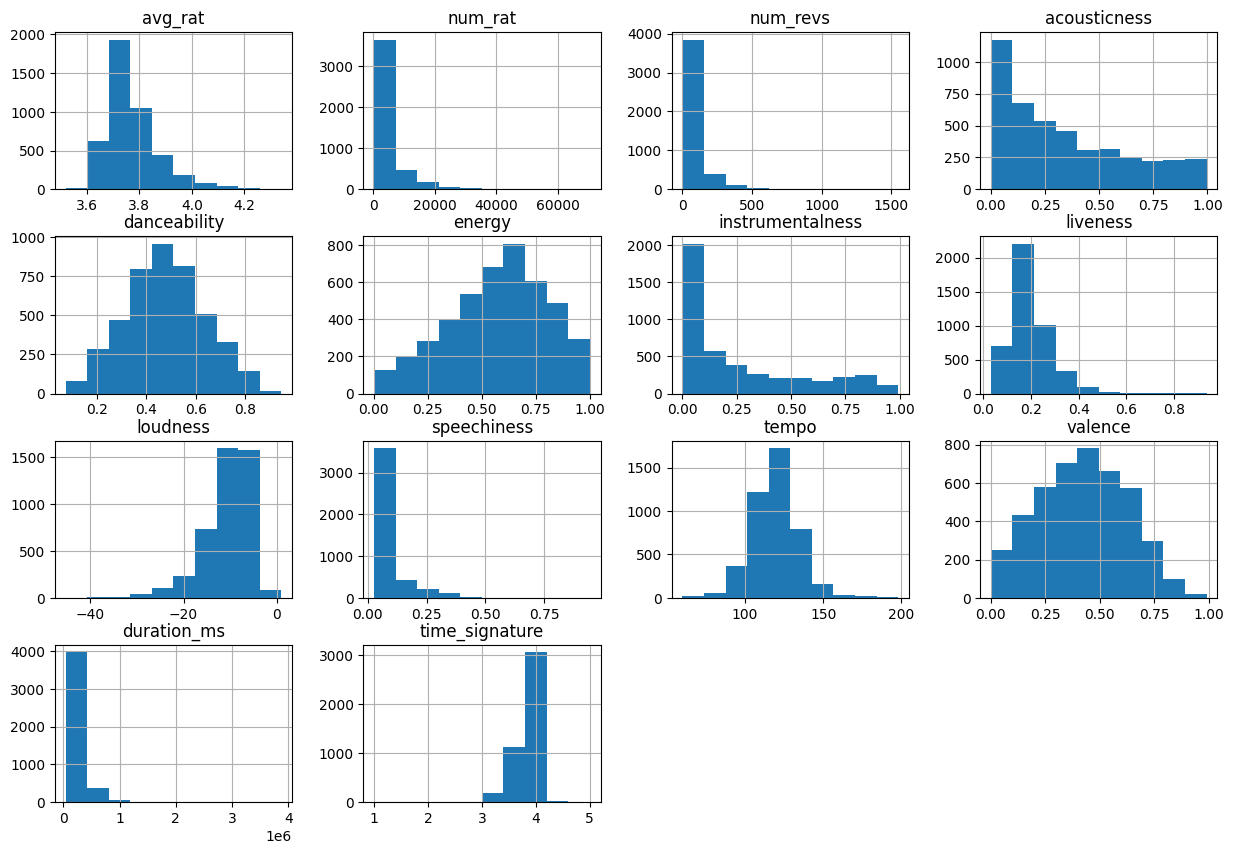

In [227]:
clean_albums.hist(figsize=(15,10))
plt.show()

### Average Rating

Since the data comes from a list of Greatest Albums of All Time, we find that the albums with the worst average rating are still critically acclaimed and fan beloved albums. So this feature might not be a great differentiator.

##### Highest Average Rating

In [312]:
clean_albums.sort_values('avg_rat', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
13,Mingus,1963,"Avant-Garde Jazz, Third Stream","instrumental, complex, passionate, suite, dens...",4.34,20251,365,The Black Saint and the Sinner Lady,0.185575,0.261750,0.544750,0.040477,0.125425,-8.778750,0.045025,121.647000,0.296500,591406.750,3.7500,Jazz
2,King Crimson,1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125,3.8750,Rock
15,John Coltrane,1965,Spiritual Jazz,"passionate, spiritual, instrumental, improvisa...",4.30,25040,433,A Love Supreme,0.627250,0.373000,0.521250,0.010804,0.234150,-12.764000,0.068400,109.123250,0.435500,491530.250,4.2500,Jazz
1,Pink Floyd,1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000,3.6000,Rock
4,Kendrick Lamar,2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750,3.8125,Hip Hop


##### Lowest Average Rating

In [293]:
clean_albums.sort_values('avg_rat').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
3898,Guns n' Roses,1987,Hard Rock,"energetic, sexual, drugs, male vocals, hedonis...",3.52,16526,614,Appetite for Destruction,0.051042,0.396000,0.982250,0.071350,0.240842,-5.354667,0.092483,129.642750,0.347417,268846.583333,4.0,Rock
3894,Kendrick Lamar,2017,"West Coast Hip Hop, Conscious Hip Hop","introspective, conscious, male vocals, rhythmi...",3.52,30228,235,Damn.,0.175444,0.663000,0.584857,0.006142,0.223071,-7.863857,0.275729,136.751857,0.479929,235783.785714,4.0,Hip Hop
3775,AC/DC,1980,Hard Rock,"energetic, male vocals, sexual, rhythmic, raw,...",3.54,15828,563,Back in Black,0.027623,0.455900,0.846900,0.012065,0.329250,-5.004600,0.057400,129.721800,0.592300,252812.000000,4.0,Rock
3354,Kanye West,2008,"Electropop, Synthpop","cold, lonely, breakup, male vocals, sad, intro...",3.54,28372,230,808s & Heartbreak,0.206192,0.656167,0.480917,0.148945,0.229450,-9.316500,0.057975,119.701500,0.350908,260431.083333,4.0,Rock
4360,Brockhampton,2017,"Pop Rap, West Coast Hip Hop","eclectic, boastful, male vocals, LGBT, vulgar,...",3.55,17629,70,Saturation,0.385893,0.594200,0.604600,0.050179,0.352713,-8.401067,0.156140,111.038600,0.547467,185479.266667,4.0,Hip Hop


### Number of Ratings

This feature could be useful to differentiate well known albums from more obscure ones. But this could bias the recommendation model against suggesting albums that are not very well known, which we don't want.

##### Highest Number of Ratings

In [295]:
clean_albums.sort_values('num_rat', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
0,Radiohead,1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000,Alternative
3,Radiohead,2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824,Alternative
6,Pink Floyd,1973,"Art Rock, Progressive Rock","philosophical, atmospheric, introspective, exi...",4.20,57622,1549,The Dark Side of the Moon,0.390310,0.383000,0.400450,0.595929,0.237680,-15.701900,0.058660,120.066200,0.272830,257363.600000,3.700000,Rock
5,My Bloody Valentine,1991,"Shoegaze, Noise Pop","noisy, ethereal, atmospheric, romantic, dense,...",4.24,49887,1223,Loveless,0.185593,0.227009,0.615364,0.787091,0.238555,-13.224727,0.049436,119.816091,0.286918,265148.000000,3.636364,Alternative
1,Pink Floyd,1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000,Rock


##### Lowest Number of Ratings

In [313]:
clean_albums.sort_values('num_rat').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
2084,Eddie Henderson,1973,Jazz Fusion,"improvisation, instrumental, avant-garde, surreal",3.81,260,9,Realization,0.457330,0.417400,0.444400,0.005682,0.428080,-12.485400,0.032910,113.591800,0.544200,233193.600000,3.900000,Jazz
3713,Changó,1975,"Latin Rock, Progressive Rock",,3.73,263,14,Changó,0.626789,0.690263,0.635684,0.008530,0.143853,-9.945947,0.049642,110.974632,0.902316,172066.263158,3.947368,Rock
4331,Atila,1976,Progressive Rock,,3.71,265,12,Intención,0.836000,0.726000,0.341000,0.000244,0.112000,-17.138000,0.364000,180.151000,0.777000,39765.000000,4.000000,Rock
3774,Roy Buchanan,1973,"Blues Rock, Electric Blues",,3.73,269,12,Second Album,0.165308,0.541250,0.599333,0.000000,0.203292,-8.756750,0.032625,130.723583,0.694833,156667.833333,3.916667,Rock
3321,"Albert Collins, Robert Cray & Johnny Copeland",1985,"Electric Texas Blues, Electric Blues",,3.74,274,10,Showdown!,0.035500,0.714000,0.630000,0.029400,0.092200,-11.098000,0.129000,114.945000,0.378000,120187.000000,4.000000,Folk


### Number of Reviews

Like Number of Ratings, this feature could negatively impact our model by biasing against more obscure albums.

##### Highest Number of Reviews

In [291]:
clean_albums.sort_values('num_revs', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
6,Pink Floyd,1973,"Art Rock, Progressive Rock","philosophical, atmospheric, introspective, exi...",4.20,57622,1549,The Dark Side of the Moon,0.390310,0.383000,0.400450,0.595929,0.237680,-15.701900,0.058660,120.066200,0.272830,257363.600000,3.700000,Rock
0,Radiohead,1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000,Alternative
5,My Bloody Valentine,1991,"Shoegaze, Noise Pop","noisy, ethereal, atmospheric, romantic, dense,...",4.24,49887,1223,Loveless,0.185593,0.227009,0.615364,0.787091,0.238555,-13.224727,0.049436,119.816091,0.286918,265148.000000,3.636364,Alternative
10,The Beatles,1966,"Pop Rock, Psychedelic Pop","psychedelic, melodic, male vocals, drugs, ecle...",4.23,43178,1160,Revolver,0.406135,0.482429,0.530571,0.026008,0.254457,-8.736286,0.039271,126.280571,0.626171,148997.071429,3.928571,Rock
29,The Beatles,1968,"Pop Rock, Rock","eclectic, melodic, playful, male vocals, quirk...",4.14,35545,1085,The Beatles [White Album],0.395290,0.502567,0.503810,0.153951,0.267787,-11.117333,0.059757,117.564000,0.563133,187387.566667,3.900000,Rock


##### Lowest Number of Reviews

In [315]:
clean_albums.sort_values('num_revs').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
810,Berliner Philharmoniker / Herbert von Karajan,1962,"Symphony, Romanticism","symphony, instrumental, orchestral, acoustic, ...",3.89,400,0,Symphonie Nr. 7,0.925000,0.206200,0.075840,0.577400,0.129000,-25.4930,0.040100,93.544400,0.114240,882610.800000,4.0,Classical
4228,Bengt Berger & Bitter Funeral Beer Band,1982,"Avant-Garde Jazz, Afro-Jazz, Spiritual Jazz","rhythmic, tribal, avant-garde, playful, improv...",3.71,326,0,Bitter Funeral Beer,0.358200,0.478600,0.471200,0.624600,0.143940,-16.7802,0.045700,110.214400,0.787400,515125.200000,3.2,Jazz
3034,Cristobal Tapia de Veer,2013,"Television Music, Experimental, Ambient","dark, abstract, avant-garde, androgynous vocal...",3.71,339,0,Utopia,0.238854,0.823615,0.690231,0.000005,0.153931,-4.3510,0.051162,124.651308,0.881769,218812.307692,4.0,Experimental
3543,鷺巣詩郎 [Shiro Sagisu],1996,"Television Music, Cinematic Classical","melodic, instrumental, triumphant, epic, lush,...",3.73,328,0,Neon Genesis Evangelion II,0.000262,0.385000,0.795000,0.003100,0.172000,-5.8190,0.046100,174.908000,0.517000,165277.000000,4.0,Classical
482,Wiener Philharmoniker / Carlos Kleiber,1976,"Symphony, Classical Period","symphony, acoustic, instrumental, epic, lush, ...",3.96,342,0,Symphonie Nr.7,0.925000,0.206200,0.075840,0.577400,0.129000,-25.4930,0.040100,93.544400,0.114240,882610.800000,4.0,Classical


### Acousticness

It seems to correctly distinguish between mellow instrumentation and heavier genres.

##### Highest Acousticness

In [285]:
clean_albums.sort_values('acousticness', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
2962,toe,2009,Math Rock,"mellow, uncommon time signatures, melodic, mel...",3.71,2545,17,For Long Tomorrow,0.9960,0.5420,0.026300,0.9500,0.10800,-30.0780,0.18600,69.3590,0.82600,101500.0,4.0,Rock
3571,The Pentangle,1968,"British Folk Rock, Progressive Folk, Folk Baroque","female vocals, acoustic, pastoral, technical, ...",3.71,923,25,Sweet Child,0.9955,0.6940,0.032250,0.9545,0.12200,-29.5575,0.05185,104.9960,0.57050,124638.5,3.5,Folk
2724,Keith Jarrett,1999,ECM Style Jazz,"melodic, peaceful, soft, mellow, instrumental,...",3.75,512,13,"The Melody at Night, With You",0.9953,0.5204,0.019518,0.9185,0.11765,-24.3867,0.09863,86.3853,0.11181,327279.9,3.8,Jazz
1646,Philip Glass,2002,"Film Score, Modern Classical",,3.81,504,5,The Hours,0.9950,0.4150,0.026000,0.9380,0.10700,-36.7000,0.04960,136.1910,0.26800,285443.0,4.0,Classical
1316,Nino Rota / Carmine Coppola,1974,"Film Score, Cinematic Classical",,3.84,353,2,"The Godfather, Part II",0.9950,0.4890,0.058000,0.9400,0.11000,-17.8760,0.05210,63.8760,0.18300,162586.0,4.0,Classical


##### Lowest Acousticness

In [290]:
clean_albums.sort_values('acousticness').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
765,Bolt Thrower,1992,Death Metal,"war, rhythmic, heavy, dark, male vocals, dense...",3.86,2963,43,The IVth Crusade,6.609091e-07,0.164627,0.763636,0.788818,0.103555,-12.545727,0.058555,130.866727,0.266591,291666.636364,3.818182,Metal
3090,Death,1987,Death Metal,"aggressive, violence, raw, death, male vocals,...",3.66,8021,138,Scream Bloody Gore,1.240000e-06,0.213100,0.919000,0.586060,0.184860,-8.022200,0.076500,109.294100,0.196590,225533.300000,4.000000,Metal
831,Incantation,1998,Death Metal,"infernal, dark, heavy, dense, rhythmic, aggres...",3.85,1601,21,Diabolical Conquest,1.372500e-06,0.158875,0.916375,0.921750,0.227750,-6.487500,0.136513,137.864000,0.059388,339675.000000,3.875000,Metal
4394,Nails,2013,"Grindcore, Powerviolence","aggressive, heavy, chaotic, angry, misanthropi...",3.64,3864,36,Abandon All Life,1.439000e-06,0.228300,0.942400,0.826200,0.208680,-4.288400,0.110690,120.085700,0.130850,105885.300000,4.000000,Punk
1007,Necrophobic,1993,Death Metal,"anti-religious, heavy, nocturnal, death, misan...",3.84,1634,26,The Nocturnal Silence,1.480000e-06,0.176000,0.863000,0.933000,0.172000,-5.102000,0.069300,107.437000,0.197000,214334.000000,4.000000,Metal


### Danceability

The are some strange selections as the most 'danceable' albums. Among them a sludge metal album and a horror movie soundtrack.

##### Highest Danceability

In [287]:
clean_albums.sort_values('danceability', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1889,Melvins,1992,"Sludge Metal, Drone Metal","heavy, hypnotic, repetitive, male vocals, atmo...",3.75,3788,51,Lysol,0.1470,0.946,0.336,0.000000,0.1120,-15.841,0.4400,131.996,0.729,165454.0,4.0,Metal
2071,John Carpenter & Alan Howarth,1983,"Film Score, Horror Synth","suspenseful, ominous, Halloween, atmospheric, ...",3.80,300,6,Halloween III: Season of the Witch,0.7290,0.938,0.454,0.000009,0.0827,-10.213,0.0514,128.513,0.990,96348.0,4.0,Instrumental
350,Kraftwerk,1981,"Synthpop, Electronic","mechanical, futuristic, rhythmic, playful, mel...",3.91,10027,157,Computerwelt,0.0591,0.929,0.365,0.723000,0.0620,-17.911,0.0656,122.032,0.639,272334.0,4.0,Rock
2446,The Toms,1979,Power Pop,"romantic, love, melodic, bittersweet, lo-fi, s...",3.76,386,11,The Toms,0.2050,0.911,0.842,0.000015,0.1150,-4.845,0.0922,112.016,0.578,187046.0,4.0,Pop
2213,The KLF,1990,Ambient,"pastoral, warm, sampling, soothing, atmospheri...",3.73,4095,69,Chill Out,0.1980,0.909,0.288,0.891000,0.1130,-15.776,0.0895,114.720,0.720,87089.0,4.0,Experimental


##### Lowest Danceability

In [289]:
clean_albums.sort_values('danceability').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1765,John Coltrane,1970,Avant-Garde Jazz,"instrumental, energetic, passionate, technical...",3.80,933,12,Transition,0.957000,0.074900,0.173000,0.9670,0.10700,-18.872000,0.04610,175.650000,0.03730,175171.00,5.00,Jazz
1482,Tangerine Dream,1974,Berlin School,"atmospheric, instrumental, space, futuristic, ...",3.76,7494,119,Phaedra,0.972000,0.084300,0.004080,0.8540,0.10900,-31.801000,0.04200,76.940000,0.04000,196000.00,5.00,Rock
3659,Stars of the Lid,1997,"Ambient, Drone","instrumental, dark, ethereal, cold, nocturnal,...",3.68,2368,33,The Ballasted Orchestra,0.666375,0.086438,0.151350,0.9490,0.16560,-25.234125,0.05075,101.806625,0.03755,586053.50,3.25,Experimental
3810,"Pauline Oliveros, Stuart Dempster & Panaiotis",1989,"Drone, Ambient","meditative, atmospheric, instrumental, sombre,...",3.68,1698,24,Deep Listening,0.948500,0.091400,0.042982,0.8240,0.16405,-36.320000,0.06430,71.212500,0.02970,948959.75,3.75,Experimental
2035,Klaus Schulze,1975,"Berlin School, Progressive Electronic","space, ethereal, futuristic, atmospheric, inst...",3.76,2290,37,Timewind,0.298500,0.101700,0.316000,0.8535,0.34850,-20.311000,0.06545,132.142000,0.03390,1765553.00,4.00,Alternative


### Energy

Seems like an accurate feature.

##### Highest Energy

In [296]:
clean_albums.sort_values('energy', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1209,Manilla Road,1986,"Heavy Metal, US Power Metal","male vocals, epic, mythology, melodic, anti-re...",3.81,1264,18,The Deluge,0.14088,0.181570,1.000000,0.971500,0.932640,-12.989060,0.087056,89.308680,0.000010,164380.000000,3.140000,Metal
682,Darkthrone,1994,Black Metal,"cold, lo-fi, raw, dark, satanic, atmospheric, ...",3.83,8346,110,Transilvanian Hunger,0.16250,0.189750,0.999750,0.583000,0.673750,-4.155000,0.136250,138.246750,0.016700,292586.750000,4.000000,Metal
3286,Michael Chapman,1969,British Folk Rock,,3.75,303,7,Rainmaker,0.51100,0.254833,0.998667,0.781500,0.781833,-11.008500,0.080150,98.662833,0.006828,207159.500000,2.666667,Folk
2886,Avishai Cohen,2006,"Chamber Jazz, Post-Bop","instrumental, acoustic, technical",3.74,547,6,Continuo,0.54472,0.137224,0.998180,0.965020,0.370920,-21.902420,0.055930,102.040900,0.000010,360000.000000,3.180000,Jazz
398,Darkthrone,1992,Black Metal,"cold, raw, nocturnal, lo-fi, winter, satanic, ...",3.89,9007,126,A Blaze in the Northern Sky,0.00008,0.138667,0.996667,0.075623,0.320667,-5.891667,0.122000,141.722333,0.037250,421077.666667,3.833333,Metal


##### Lowest Energy

In [297]:
clean_albums.sort_values('energy').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
956,Luben Yordanoff / Albert Tétard / Claude Desur...,1988,"Modern Classical, Chamber Music","sombre, apocalyptic, religious, complex, instr...",3.85,996,8,Quatuor pour la fin du temps,0.972000,0.258000,0.002360,0.105000,0.099800,-17.656000,0.055200,69.632000,0.110000,3.995000e+05,5.000000,Classical
1500,Eliane Radigue,1998,Drone,"meditative, instrumental, hypnotic, spiritual,...",3.78,1905,21,Trilogie de la mort,0.908000,0.116100,0.002559,0.946333,0.165333,-33.176333,0.069933,114.190333,0.019790,3.376107e+06,4.000000,Experimental
442,Takács Quartet,1997,"Modern Classical, Chamber Music","string quartet, instrumental, acoustic, suspen...",3.94,958,12,The 6 String Quartets,0.946872,0.290315,0.002991,0.053313,0.104736,-27.083979,0.059828,110.844447,0.190874,1.724949e+05,3.234043,Classical
1747,Vladimir Spivakov / Sergej Bezrodny / Dietmar ...,1999,Minimalism,"peaceful, instrumental, sparse, minimalistic, ...",3.76,2064,46,Alina,0.893800,0.346200,0.003362,0.252808,0.086160,-40.058000,0.095540,76.826200,0.131340,6.157546e+05,3.400000,Classical
1482,Tangerine Dream,1974,Berlin School,"atmospheric, instrumental, space, futuristic, ...",3.76,7494,119,Phaedra,0.972000,0.084300,0.004080,0.854000,0.109000,-31.801000,0.042000,76.940000,0.040000,1.960000e+05,5.000000,Rock


### Instrumentalness

Some of the entries with the most 'instrumentalness' feature vocals prominently.

##### Highest Instrumentalness

In [298]:
clean_albums.sort_values('instrumentalness', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
758,Jeremy Soule,2002,"Video Game Music, Cinematic Classical, Modern ...","atmospheric, melancholic, instrumental, mediev...",3.88,791,12,The Elder Scrolls III: Morrowind,0.82500,0.21500,0.4140,0.9930,0.10900,-10.86400,0.032800,80.80800,0.12700,117860.0,3.00,Classical
96,John Coltrane,1960,Hard Bop,"instrumental, energetic, technical, improvisat...",4.10,13880,192,Giant Steps,0.99400,0.19200,0.0409,0.9800,0.09560,-29.46700,0.039100,69.07100,0.03940,195751.0,4.00,Jazz
2182,Catherine Ribeiro + Alpes,1972,"Avant-Folk, Progressive Folk, Psychedelic Rock","passionate, apocalyptic, epic, psychedelic, av...",3.75,1788,32,Paix,0.96900,0.32500,0.0546,0.9740,0.11300,-25.82600,0.032900,121.31100,0.12700,127013.0,4.00,Rock
1209,Manilla Road,1986,"Heavy Metal, US Power Metal","male vocals, epic, mythology, melodic, anti-re...",3.81,1264,18,The Deluge,0.14088,0.18157,1.0000,0.9715,0.93264,-12.98906,0.087056,89.30868,0.00001,164380.0,3.14,Metal
2498,The Sweet,1974,"Glam Rock, Hard Rock","male vocals, energetic, heavy, melodic, playfu...",3.74,896,38,Sweet Fanny Adams,0.95700,0.43300,0.2140,0.9690,0.10300,-18.53200,0.065700,179.14600,0.10300,129776.0,4.00,Rock


##### Lowest Instrumentalness

In [300]:
clean_albums.sort_values('instrumentalness').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
715,This Heat,1979,"Experimental Rock, Experimental","cold, ominous, mechanical, anxious, avant-gard...",3.84,6660,93,This Heat,0.0060,0.451,0.676,0.0,0.1840,-5.108,0.0291,146.019,0.3290,193816.0,4.0,Rock
2976,Threshold,2001,Progressive Metal,"melodic, progressive, male vocals, heavy, fant...",3.70,586,18,Hypothetical,0.4930,0.678,0.689,0.0,0.1400,-5.439,0.0351,65.512,0.3230,179542.0,4.0,Metal
3693,Magnetic Fields,1994,"Indie Pop, Synthpop","melodic, romantic, bittersweet, sarcastic, mal...",3.68,2652,50,Holiday,0.1200,0.810,0.511,0.0,0.0832,-6.924,0.1640,151.947,0.8370,154998.0,4.0,Rock
2981,James Brown,1971,Funk,"improvisation, rhythmic, male vocals, energeti...",3.74,725,10,Hot Pants,0.1230,0.577,0.822,0.0,0.1540,-4.542,0.1280,90.022,0.6290,206700.0,4.0,Pop
2350,Scarface,2002,"Southern Hip Hop, Gangsta Rap","introspective, crime, rhythmic, violence, reli...",3.74,1526,43,The Fix,0.0485,0.812,0.479,0.0,0.1020,-6.470,0.0429,95.505,0.0873,173045.0,4.0,Hip Hop


### Liveness

There seem to be similar entries on both extremes.

##### Highest Liveness

In [301]:
clean_albums.sort_values('liveness', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
3182,Fantasy,1973,"Progressive Rock, Symphonic Prog","melodic, progressive, epic, male vocals",3.74,374,23,Paint a Picture,0.475000,0.683000,0.677000,0.000000,0.937000,-8.056000,0.485000,81.15600,0.922000,47229.000000,4.000000,Rock
1209,Manilla Road,1986,"Heavy Metal, US Power Metal","male vocals, epic, mythology, melodic, anti-re...",3.81,1264,18,The Deluge,0.140880,0.181570,1.000000,0.971500,0.932640,-12.989060,0.087056,89.30868,0.000010,164380.000000,3.140000,Metal
4290,Zero Boys,1982,"Hardcore Punk, Punk Rock","aggressive, raw, noisy, male vocals, energetic...",3.68,738,19,Vicious Circle,0.617421,0.493868,0.985053,0.052294,0.912053,-4.635579,0.851316,90.45200,0.096192,410738.315789,3.578947,Punk
3884,Sandy Denny,1972,"British Folk Rock, Singer/Songwriter",female vocals,3.69,734,24,Sandy,0.031900,0.798000,0.666000,0.000290,0.905000,-4.876000,0.276000,149.88400,0.808000,166408.000000,4.000000,Singer/Songwriter
1961,Willie Dixon,1970,Chicago Blues,"male vocals, sexual, hypnotic",3.78,826,31,I Am the Blues,0.245680,0.532000,0.755100,0.001140,0.884600,-7.396300,0.167720,143.93720,0.633300,199754.500000,3.800000,Folk


##### Lowest Liveness

In [302]:
clean_albums.sort_values('liveness').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1696,Sonic Youth,1995,"Noise Rock, Alternative Rock, Experimental Rock","abstract, cryptic, dissonant, mysterious, nois...",3.73,8525,98,Washing Machine,0.02960,0.857,0.656,0.000003,0.0321,-5.801,0.0464,110.014,0.875,210535.0,4.0,Alternative
4254,Slapp Happy,1974,Art Pop,"surreal, melodic, quirky, poetic, lush, female...",3.69,754,23,Slapp Happy,0.00200,0.715,0.933,0.050600,0.0409,-8.526,0.1290,123.069,0.945,217152.0,4.0,Alternative
1280,山下達郎 [Tatsuro Yamashita],1980,City Pop,"passionate, optimistic, male vocals, happy, me...",3.83,1347,10,Ride on Time,0.04380,0.648,0.905,0.000473,0.0430,-4.370,0.0490,120.466,0.663,275755.0,4.0,Pop
514,Autopsy,1991,Death Metal,"death, heavy, violence, vulgar, disturbing, ra...",3.88,4292,62,Mental Funeral,0.02040,0.775,0.694,0.000000,0.0517,-6.900,0.0628,140.944,0.784,194856.0,4.0,Metal
597,Big Black,1986,"Noise Rock, Post-Hardcore","misanthropic, mechanical, aggressive, noisy, r...",3.84,9710,119,Atomizer,0.00956,0.597,0.885,0.007660,0.0521,-3.095,0.3420,168.315,0.327,195000.0,4.0,Experimental


### Loudness

Not all the way accurate

##### Highest Loudness

In [304]:
clean_albums.sort_values('loudness', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
133,Iggy and The Stooges,1973,"Proto-Punk, Garage Rock, Hard Rock","raw, energetic, sexual, noisy, rebellious, hea...",4.02,15168,376,Raw Power,0.011895,0.306250,0.973250,0.179351,0.172025,0.942625,0.144888,131.955375,0.255975,254591.625000,4.0,Punk
1484,Jay Reatard,2006,Garage Punk,"energetic, raw, lo-fi, anxious, passionate, me...",3.77,4663,50,Blood Visions,0.099271,0.297867,0.959267,0.100106,0.394527,-0.040133,0.108047,125.514333,0.388000,117145.733333,4.0,Punk
2127,Holy Terror,1988,Thrash Metal,"manic, political, apocalyptic, epic, energetic...",3.76,814,16,Mind Wars,0.111000,0.596000,0.906000,0.000038,0.312000,-0.997000,0.030800,140.106000,0.607000,180000.000000,4.0,Metal
3431,Reigning Sound,2004,"Garage Rock, Garage Punk, Punk Blues","raw, noisy, rhythmic, sexual, male vocals, ene...",3.71,772,22,Too Much Guitar,0.000253,0.254443,0.912429,0.752429,0.199071,-1.089429,0.055486,133.890429,0.551929,158741.000000,4.0,Punk
4061,Venom,1981,"Speed Metal, Heavy Metal, NWOBHM","raw, satanic, energetic, angry, heavy, inferna...",3.64,4023,96,Welcome to Hell,0.168000,0.528000,0.941000,0.000498,0.093100,-1.596000,0.193000,128.904000,0.466000,249709.000000,4.0,Metal


##### Lowest Loudness

In [316]:
clean_albums.sort_values('loudness').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
2818,Bernard Parmegiani,1978,"Musique concrète, Electroacoustic","mysterious, instrumental, dissonant, mechanica...",3.71,1230,15,De natura sonorum,0.386000,0.245000,0.325000,0.798000,0.108000,-45.267000,0.175000,132.480000,0.019500,3.415996e+06,3.000000,Experimental
1747,Vladimir Spivakov / Sergej Bezrodny / Dietmar ...,1999,Minimalism,"peaceful, instrumental, sparse, minimalistic, ...",3.76,2064,46,Alina,0.893800,0.346200,0.003362,0.252808,0.086160,-40.058000,0.095540,76.826200,0.131340,6.157546e+05,3.400000,Classical
4125,Stormwitch,1986,Heavy Metal,"melodic, male vocals, heavy, fantasy, epic",3.70,335,2,Stronger Than Heaven,0.994867,0.408067,0.008695,0.877067,0.095660,-39.666467,0.033993,88.575333,0.059813,1.265743e+05,3.866667,Metal
1208,Crimson Glory,1988,"Heavy Metal, US Power Metal","fantasy, melodic, triumphant, male vocals, sci...",3.80,1704,55,Transcendence,0.945000,0.164000,0.010500,0.802000,0.099200,-38.897000,0.043600,129.503000,0.088700,2.339550e+05,4.000000,Metal
3404,Axe,1970,"Acid Rock, Psychedelic Rock","lo-fi, female vocals, psychedelic, atmospheric",3.72,441,19,Music,0.962960,0.162838,0.007419,0.786520,0.106054,-37.298700,0.046518,93.642320,0.045054,6.266000e+04,3.620000,Rock


### Speechiness

I expected the spoken genres like standup comedy to be up here.

##### Highest Speechiness

In [305]:
clean_albums.sort_values('speechiness', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1546,The Saints,1977,Punk Rock,"energetic, raw, male vocals, rebellious, sexua...",3.79,2056,66,(I'm) Stranded,0.327000,0.732000,0.088600,0.000000,0.213000,-24.061000,0.944000,180.060000,0.617000,54534.000000,3.000000,Punk
3885,Seventh Wonder,2008,Progressive Metal,"..., melodic, male vocals, concept album, prog...",3.65,583,30,Mercy Falls,0.530960,0.688860,0.208372,0.000004,0.173082,-14.662200,0.915700,109.565520,0.354900,185199.800000,3.700000,Metal
1395,Da Koopsta Knicca,1994,"Memphis Rap, Southern Hip Hop","lo-fi, crime, dark, raw, violence, infernal, o...",3.81,331,5,The Devil's Playground,0.536900,0.690160,0.157080,0.000000,0.173120,-18.278780,0.907920,110.362280,0.458480,185522.320000,3.700000,Hip Hop
3269,Konzerthaus Kammerorchester Berlin / André de ...,2012,Modern Classical,"acoustic, instrumental, orchestral, lush, seas...",3.68,1701,33,Recomposed by Max Richter: Vivaldi - The Four ...,0.925929,0.699214,0.189071,0.000001,0.459071,-22.984000,0.888286,95.576786,0.717714,47421.142857,2.928571,Classical
1361,Gris,2007,"Depressive Black Metal, Atmospheric Black Metal","depressive, cold, lonely, self-hatred, passion...",3.79,2606,41,Il était une forêt...,0.415375,0.650625,0.638875,0.000000,0.379437,-8.811937,0.855938,102.075563,0.653875,86325.062500,3.562500,Metal


##### Lowest Speechiness

In [317]:
clean_albums.sort_values('speechiness').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1183,Víctor Jara,1971,Nueva canción latinoamericana,"male vocals, conscious, political, protest, pa...",3.84,1119,13,El derecho de vivir en paz,0.49700,0.4620,0.4490,0.000014,0.08620,-7.0120,0.02620,151.8910,0.3480,227444.0,3.0,World
3502,Jesu,2004,"Drone Metal, Shoegaze, Post-Metal","atmospheric, dense, heavy, hypnotic, repetitiv...",3.65,5691,80,Jesu,0.46900,0.5780,0.4310,0.000000,0.13700,-7.0340,0.02690,116.9790,0.2100,226975.0,3.0,Metal
2593,Marillion,1984,Neo-Prog,"passionate, melodic, introspective, male vocal...",3.72,2473,76,Fugazi,0.49800,0.6230,0.2870,0.134000,0.25100,-10.6320,0.02700,107.9390,0.0902,266320.0,4.0,Alternative
2969,Peter Hammill,1974,"Art Rock, Avant-Prog, Progressive Rock","avant-garde, philosophical, existential, poeti...",3.72,1090,31,In Camera,0.54350,0.5475,0.5220,0.050276,0.13414,-7.1744,0.02702,118.6282,0.3674,210236.0,3.8,Rock
3860,Helloween,2000,Power Metal,"male vocals, melodic, anthemic, energetic, pas...",3.66,1691,35,The Dark Ride,0.30925,0.5210,0.6305,0.602600,0.15025,-7.1368,0.02737,113.6388,0.5679,240916.0,3.7,Metal


### Tempo

Seems fairly accurate

##### Fastest Tempos

In [307]:
clean_albums.sort_values('tempo', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
4291,The Divine Comedy,1994,"Chamber Pop, Baroque Pop","humorous, concept album, poetic, melancholic, ...",3.67,733,18,Promenade,0.02400,0.596,0.526,0.635000,0.1040,-9.355,0.0956,197.931,0.547,237500.0,4.0,Pop
3957,Therion,2004,Symphonic Metal,"pagan, mythology, male vocals, epic, female vo...",3.64,1195,20,Lemuria,0.02400,0.596,0.526,0.635000,0.1040,-9.355,0.0956,197.931,0.547,237500.0,4.0,Metal
3110,"Kenny Wheeler, Lee Konitz, Dave Holland & Bill...",1997,"Post-Bop, ECM Style Jazz","nocturnal, calm",3.75,310,3,Angel Song,0.00579,0.588,0.821,0.000275,0.2080,-6.540,0.2160,188.098,0.509,182075.0,4.0,Jazz
3378,Eddie and the Hot Rods,1977,"Pub Rock, Punk Rock","male vocals, energetic, melodic, rebellious, u...",3.73,370,11,Life on the Line,0.06300,0.568,0.730,0.000000,0.1110,-6.257,0.3080,186.120,0.667,237403.0,4.0,Punk
3379,Leño,1979,"Hard Rock, Rock urbano español, Progressive Rock","lo-fi, rebellious, urban, male vocals",3.72,326,9,Leño,0.08590,0.577,0.793,0.000360,0.0877,-5.790,0.1190,185.043,0.864,228461.0,4.0,Rock


##### Slowest Tempos

In [318]:
clean_albums.sort_values('tempo').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
1736,Cocteau Twins,1983,"Ethereal Wave, Gothic Rock, Post-Punk, Dream Pop","dark, atmospheric, cryptic, female vocals, col...",3.74,7597,93,Head Over Heels,0.492,0.630,0.441,0.000,0.119,-9.829,0.0355,60.011,0.5050,234867.0,4.0,Punk
3565,Fifth Angel,1986,"Heavy Metal, US Power Metal","melodic, rhythmic, anthemic, triumphant, energ...",3.70,448,10,Fifth Angel,0.896,0.338,0.233,0.000,0.113,-8.641,0.0399,63.184,0.3570,231307.0,4.0,Metal
1316,Nino Rota / Carmine Coppola,1974,"Film Score, Cinematic Classical",,3.84,353,2,"The Godfather, Part II",0.995,0.489,0.058,0.940,0.110,-17.876,0.0521,63.876,0.1830,162586.0,4.0,Classical
2976,Threshold,2001,Progressive Metal,"melodic, progressive, male vocals, heavy, fant...",3.70,586,18,Hypothetical,0.493,0.678,0.689,0.000,0.140,-5.439,0.0351,65.512,0.3230,179542.0,4.0,Metal
2028,Bill Evans,1974,"Third Stream, Post-Bop","complex, passionate, improvisation, instrument...",3.79,568,5,Symbiosis,0.972,0.470,0.030,0.909,0.108,-24.521,0.0392,67.885,0.0614,149875.0,3.0,Experimental


### Valence

In [308]:
clean_albums.sort_values('valence', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
2071,John Carpenter & Alan Howarth,1983,"Film Score, Horror Synth","suspenseful, ominous, Halloween, atmospheric, ...",3.80,300,6,Halloween III: Season of the Witch,0.729,0.938,0.454,0.000009,0.0827,-10.213,0.0514,128.513,0.990,96348.0,4.0,Instrumental
757,Pierre Hantaï,2003,Baroque Music,"acoustic, instrumental, complex, melodic, poly...",3.90,345,1,Variations Goldberg BWV 988,0.797,0.345,0.651,0.850000,0.3630,-14.273,0.0316,111.113,0.979,112653.0,3.0,Classical
2695,Virus,1985,"Synthpop, New Wave","sexual, male vocals, sensual, melodic, LGBT, h...",3.73,640,8,Locura,0.267,0.671,0.906,0.000000,0.3040,-3.136,0.2250,155.991,0.967,225213.0,4.0,Rock
2858,Kenny Dorham,1964,Hard Bop,,3.76,471,8,Una más (One More Time),0.420,0.711,0.629,0.000036,0.0623,-14.053,0.0595,175.936,0.964,199210.0,4.0,Jazz
2964,Therion,1996,Symphonic Metal,"male vocals, occult, mythology, epic, triumpha...",3.67,1763,46,Theli,0.231,0.625,0.922,0.000000,0.6840,-4.793,0.1270,175.969,0.962,178852.0,4.0,Metal


### Duration

The albums with the 'longest duration' seem to contain songs with lengthy durations without being lengthy albums.

##### Longest Duration

In [310]:
clean_albums.sort_values('duration_ms', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
2834,Estas Tonne,2013,"New Age, Flamenco nuevo","instrumental, ethereal, acoustic, atmospheric,...",3.74,645,5,Internal Flight,0.9460,0.30000,0.640000,0.893000,0.078300,-9.266000,0.036700,159.624000,0.21200,3876277.0,4.0,World
4138,Mike Oldfield,1990,"Progressive Rock, New Age","eclectic, progressive, melodic, complex, instr...",3.66,1310,49,Amarok,0.2110,0.42100,0.321000,0.428000,0.540000,-15.240000,0.036800,108.080000,0.11900,3602933.0,4.0,Rock
2818,Bernard Parmegiani,1978,"Musique concrète, Electroacoustic","mysterious, instrumental, dissonant, mechanica...",3.71,1230,15,De natura sonorum,0.3860,0.24500,0.325000,0.798000,0.108000,-45.267000,0.175000,132.480000,0.01950,3415996.0,3.0,Experimental
1500,Eliane Radigue,1998,Drone,"meditative, instrumental, hypnotic, spiritual,...",3.78,1905,21,Trilogie de la mort,0.9080,0.11610,0.002559,0.946333,0.165333,-33.176333,0.069933,114.190333,0.01979,3376107.0,4.0,Experimental
2153,Henry Flynt,1986,"Drone, Avant-Folk, Free Folk","instrumental, hypnotic, psychedelic, atmospher...",3.74,2486,25,You Are My Everlovin / Celestial Power,0.8025,0.19475,0.361500,0.566000,0.201900,-9.222500,0.043000,105.421000,0.08490,2634913.5,4.0,Folk


##### Shortest Duration

In [319]:
clean_albums.sort_values('duration_ms').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
4331,Atila,1976,Progressive Rock,,3.71,265,12,Intención,0.836000,0.726000,0.341000,0.000244,0.112000,-17.138000,0.364000,180.151000,0.777000,39765.000000,4.000000,Rock
3182,Fantasy,1973,"Progressive Rock, Symphonic Prog","melodic, progressive, epic, male vocals",3.74,374,23,Paint a Picture,0.475000,0.683000,0.677000,0.000000,0.937000,-8.056000,0.485000,81.156000,0.922000,47229.000000,4.000000,Rock
3269,Konzerthaus Kammerorchester Berlin / André de ...,2012,Modern Classical,"acoustic, instrumental, orchestral, lush, seas...",3.68,1701,33,Recomposed by Max Richter: Vivaldi - The Four ...,0.925929,0.699214,0.189071,0.000001,0.459071,-22.984000,0.888286,95.576786,0.717714,47421.142857,2.928571,Classical
3622,NoMeansNo,1991,"Post-Hardcore, Art Punk","rhythmic, energetic, humorous, quirky, satiric...",3.70,1198,14,0 + 2 = 1,0.795789,0.472895,0.762474,0.903211,0.454947,-6.876316,0.077142,113.041158,0.904526,52155.368421,3.526316,Punk
1546,The Saints,1977,Punk Rock,"energetic, raw, male vocals, rebellious, sexua...",3.79,2056,66,(I'm) Stranded,0.327000,0.732000,0.088600,0.000000,0.213000,-24.061000,0.944000,180.060000,0.617000,54534.000000,3.000000,Punk


### Time Signature

Doesn't seem very accurate either

##### Highest Time Signature

In [320]:
clean_albums.sort_values('time_signature', ascending=False).head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
2603,Tommy Wright III,1995,"Memphis Rap, Gangsta Rap, Southern Hip Hop","crime, lo-fi, dark, death, repetitive, urban, ...",3.73,885,2,Runnin-n-Gunnin,0.0912,0.657000,0.408000,0.000,0.454000,-14.352000,0.33600,108.302000,0.41900,1.937040e+05,5.0,Hip Hop
2685,William Basinski,2003,"Tape Music, Ambient, Minimalism","repetitive, ethereal, minimalistic, hypnotic, ...",3.69,3752,31,The Disintegration Loops II,0.9275,0.183500,0.232000,0.951,0.077450,-25.987500,0.05055,85.968000,0.13250,2.235500e+06,5.0,Experimental
1482,Tangerine Dream,1974,Berlin School,"atmospheric, instrumental, space, futuristic, ...",3.76,7494,119,Phaedra,0.9720,0.084300,0.004080,0.854,0.109000,-31.801000,0.04200,76.940000,0.04000,1.960000e+05,5.0,Rock
613,Isis,2002,"Atmospheric Sludge Metal, Post-Metal","atmospheric, aquatic, heavy, male vocals, conc...",3.85,7200,100,Oceanic,0.0778,0.186667,0.629333,0.781,0.395333,-32.522667,0.06450,109.985667,0.00897,2.035623e+05,5.0,Metal
2442,J-Live,2001,"East Coast Hip Hop, Boom Bap, Conscious Hip Hop","urban, conscious, sampling, rhythmic, boastful...",3.74,802,20,The Best Part,0.0676,0.393000,0.724000,0.000,0.205000,-5.540000,0.08250,89.684000,0.14700,1.968740e+05,5.0,Hip Hop


##### Lowest Time Signature

In [322]:
clean_albums.sort_values('time_signature').head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,genre
313,R.E.M.,1983,"Jangle Pop, Alternative Rock","cryptic, melodic, atmospheric, male vocals, po...",3.90,14362,292,Murmur,0.8915,0.203000,0.048600,0.844000,0.111000,-28.527000,0.059000,114.526000,0.066450,194000.000000,1.000000,Alternative
2866,Autechre,1994,"IDM, Ambient Techno","atmospheric, mysterious, hypnotic, rhythmic, i...",3.68,7979,82,Amber,0.1650,0.431000,0.256000,0.000000,0.113000,-9.782000,0.037700,95.682000,0.212000,155418.000000,1.000000,Instrumental
108,John Coltrane,1961,"Modal Jazz, Post-Bop","instrumental, warm, improvisation, passionate,...",4.10,11660,156,My Favorite Things,0.9940,0.326333,0.037000,0.964333,0.111667,-21.392000,0.035767,68.002000,0.102333,162679.000000,2.333333,Jazz
1601,Venetian Snares,2005,"Breakcore, Drill and Bass, Modern Classical","manic, anxious, uncommon time signatures, mela...",3.73,8369,115,Rossz csillag alatt született,0.5706,0.425182,0.582364,0.666455,0.147955,-9.342545,0.151427,138.877182,0.165618,255092.272727,2.454545,Classical
3696,Paysage d'Hiver,2013,Atmospheric Black Metal,"cold, lo-fi, winter, atmospheric, raw, hypnoti...",3.68,2007,35,Das Tor,0.9875,0.365000,0.047650,0.881500,0.101800,-27.292500,0.039150,106.672500,0.305000,176042.000000,2.500000,Metal


# Export Data

In [228]:
clean_albums.to_csv('albums_dw.csv')